In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate Data

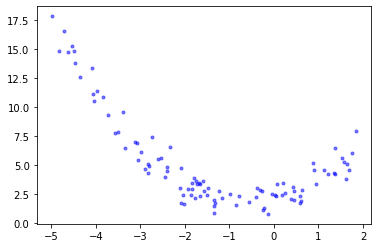

In [308]:
np.random.seed(7)
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
d_nl = pd.DataFrame(raw_data)

plt.plot(d_nl["1"], d_nl["label"], 'b.', alpha=0.5)

In [309]:
d_nl.head(5)

,1,label
0,-4.465842,13.739711
1,0.459432,1.991580
2,-1.931135,2.945694
3,0.064256,3.358019
4,1.845927,7.916870


# Neural Network Algorithm

To-Dos:
1. First write in function form, then generalize to a class
2. Add different types of activation functions and experiment with their differences

## Initialization

In [310]:
# initialize parameters
layers = 2
hidden_neurons = 2
epochs = 20000
num_inputs = 1
label = d_nl['label'].to_numpy()

In [253]:
# initialize weights
def init_weights(num_inputs):
    """
        Initialize weights at random from a Gaussian distribution
        with mean 0 and standard deviation 1/m
    """
    w_l1 = [[np.random.normal(0, 1), np.random.normal(0, 1/num_inputs)], [np.random.normal(0, 1), np.random.normal(0, 1/num_inputs)]]
    w_l2 = [np.random.normal(0, 1), np.random.normal(0, 1/num_inputs), np.random.normal(0, 1/num_inputs)]
    weights_init = [w_l1, w_l2]
    # for l in range(layers):
    #     w_l = [np.random.normal(0, 1)] # weight parameters for one layer， [wl_0, wl]
    #     for _ in range(num_inputs):
    #         w_l.append(np.random.normal(0, 1/num_inputs))
    #     weights_init.append(w_l)
    return weights_init

print(init_weights(num_inputs))

[[[0.31014996682084994, 0.8518166929985608], [-0.8144191926444011, -0.49171704270622973]], [0.37264552396423856, -0.0516495964628359, -0.6402811265470353]]


In [254]:
def prepare_x(index, training_data):
    x = [1]
    for column_name in training_data.columns:
        if column_name != "label":
            x.append(training_data[column_name].to_numpy()[index])
    return x

In [314]:
# helper functions
def sigmoid(Z):
    return [1.0 / (1.0 + np.exp(-z)) for z in Z]

def sigmoid_i(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_deriv(z):
    return sigmoid_i(z)*(1-sigmoid_i(z))

def error(predicted, target):
    return np.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

## NN Training

In [330]:
# per iteration (epoch) training
def train_epoch(A0, index, learn_rate, weights, epoch):
    """
        A0 is x_i, where i is randomly selected from gd
    """
    A = [A0]
    z = [0]
    w = weights

    # feedforward
    # layer 1
    z_1_0 = np.dot(w[0][0], A[0])
    a_1_0 = sigmoid_i(z_1_0)
    z_1_1 = np.dot(w[0][1], A[0])
    a_1_1 = sigmoid_i(z_1_1)
    z_1 = [1, z_1_0, z_1_1]
    a_1 = [1, a_1_0, a_1_1]    
    z.append(z_1)
    A.append(a_1)

    # layer 2
    z_2 = np.dot(w[1], A[1])
    a_2 = z_2
    z.append(z_2)
    A.append(a_2)
    #checkpoint 1

    # backpropagation
    # layer 2
    error_deriv_2 = error_predicted_deriv(A[2], label[index]) #constant
    act_deriv_2 = 1
    gradient_2 = np.multiply(np.multiply(A[1], act_deriv_2), error_deriv_2) #len = 3
    w[1] -= learn_rate * gradient_2 #len(w[1]) = 3

    # layer 1, neuron 1
    act_deriv_1_1 = sigmoid_deriv(z_1_0)
    error_deriv_1_1 = w[1][1] * error_deriv_2
    gradient_1_1 = np.multiply(np.multiply(A0, act_deriv_1_1), error_deriv_1_1)
    w[0][0] -= learn_rate * gradient_1_1

    # layer 1, neuron 2
    act_deriv_1_2 = sigmoid_deriv(z_1_1)
    error_deriv_1_2 = w[1][2] * error_deriv_2
    gradient_1_2 = np.multiply(np.multiply(A0, act_deriv_1_2), error_deriv_1_2)
    w[0][1] -= learn_rate * gradient_1_2

    # for layer in range(layers): #0, 1
    #     if layer == 0:
    #         z_l = np.multiply(np.transpose(w[layer]), A[layer])
    #         A_l = sigmoid(z_l)
    #         A.append(A_l)
    #         z.append(z_l)

    # if epoch % 1500 == 0:
    #     err = error(A[-1], label[index])
    #     print(f"epoch: {epoch}, err: {err}")
    #     print(f"current weights: {w}")

    # # backward propagation
    # for layer in np.arange(layers, 0, -1):
    #     error_deriv = error_predicted_deriv(A[layer], label[index])
    #     sigm_deriv = sigmoid_deriv(z[layer])
    #     gradient = np.multiply(np.multiply(sigm_deriv, error_deriv), A[layer-1])
    #     w[layer-1] -= learn_rate * gradient
    
    return w

In [331]:
# perform sgd
def train():
    weights = init_weights(num_inputs)
        
    for t in range(epochs):
        learn_rate = 1
        if t != 0:
            learn_rate = 1/t
        length = len(label)
        index = np.random.randint(0, length-1)
        inpt = prepare_x(index, d_nl)
        weights = train_epoch(A0=inpt, index=index, learn_rate=learn_rate, weights=weights, epoch=t)
    
    return weights

In [377]:
def predict(weights, inpt):
    z_1_0 = np.dot(weights[0][0], inpt)
    a_1_0 = sigmoid_i(z_1_0)
    z_1_1 = np.dot(weights[0][1], inpt)
    a_1_1 = sigmoid_i(z_1_1)
    a_1 = [1, a_1_0, a_1_1]

    z_2 = np.dot(weights[1], a_1)
    a_2 = z_2
    return a_2

In [378]:
d_nl.head(5)

,1,label
0,-4.465842,13.739711
1,0.459432,1.991580
2,-1.931135,2.945694
3,0.064256,3.358019
4,1.845927,7.916870


In [385]:
inpt_lst = d_nl["1"].to_list()
opt_lst = []
weights = train()
for inpt in inpt_lst:
    opt = predict(weights, [1, inpt])
    opt_lst.append(opt)

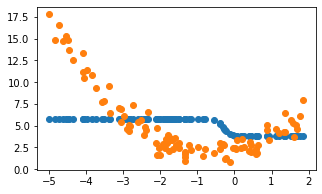

In [386]:
# print(weights)

# line_indpt = np.linspace(-5, 2, 500)
# line = weights[1][1] * line_indpt + weights[1][2] * line_indpt + weights[1][0]
plt.figure(figsize=(5,3))
plt.scatter(inpt_lst, opt_lst)
plt.scatter(d_nl['1'], d_nl["label"])
# plt.plot(line_indpt, line, color="orange")

In [373]:
result = predict([1, 10])
result

3.6128498586147915

In [324]:
weights = train()

epoch: 0, err: 16.599547782551273
current weights: [[array([ 3.27621063, -4.12939658]), array([  8.78180451, -15.43754131])], array([6.59851148, 8.51161878, 5.68412689])]
output: -1.6509556806822303
epoch: 1500, err: 8.36868181912744
current weights: [[array([ 2.20995011, -3.92689263]), array([  8.8446018 , -15.40473657])], array([ 3.37235098,  2.59449901, -0.66216199])]
output: 5.316165984574728
epoch: 3000, err: 2.3734859007815357
current weights: [[array([ 2.00449622, -3.96184543]), array([  8.87006975, -15.39088819])], array([ 3.54718267,  2.62377783, -0.71833413])]
output: 5.455685074323993
epoch: 4500, err: 7.762082782948541
current weights: [[array([ 1.85947422, -3.98738287]), array([  8.88584445, -15.38226575])], array([ 3.57600848,  2.5753989 , -0.83008853])]
output: 5.317356314671729
epoch: 6000, err: 0.3355631906529995
current weights: [[array([ 1.76670241, -4.00137374]), array([  8.89591012, -15.3768262 ])], array([ 3.6269728 ,  2.59067586, -0.85931321])]
output: 3.93543300

[[array([ 2.45477325, -2.73888275]), array([ -2.4739769 , -12.77400399])], array([ 4.53112919, -1.96897199,  3.23589721])]


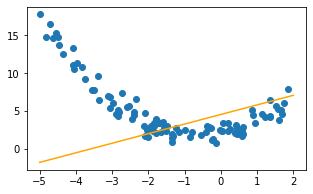

In [321]:
print(weights)

line_indpt = np.linspace(-5, 2, 500)
line = weights[1][1] * line_indpt + weights[1][2] * line_indpt + weights[1][0]
plt.figure(figsize=(5,3))
plt.scatter(d_nl['1'], d_nl["label"])
plt.plot(line_indpt, line, color="orange")

In [78]:
nn = NeuralNetwork(layers=2, training_data=data, epochs=10000, learn_rate=0.01, num_inputs=1)
nn.train()

[[-1.092798041883344, -0.49480167145947485], [-0.8328071561704362, -0.466513810172211]]


ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [35]:
np.random.randint(0, 10)

1